# Data Analytics II

#### 1. Implement	logistic	regression	using	Python/R	to	perform	classification	on Social_Network_Ads.csv dataset.

In [19]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
for i in range(len(df.Gender)):
    if df["Gender"][i] == "Male":
        df["Gender"][i] = 0
    else:
        df["Gender"][i] = 1
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [26]:
X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, 4].values

print(X[:3, :])
print("--------------")
print(y[:3])

[[0 19 19000]
 [0 35 20000]
 [1 26 43000]]
--------------
[0 0 0]


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 3)
(100, 3)
(300,)
(100,)


In [32]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

print(X_train[:3, :])
print("----------------------------------------")
print(X_test[:3, :])

[[ 0.98019606  0.58164944 -0.88670699]
 [-1.02020406 -0.60673761  1.46173768]
 [ 0.98019606 -0.01254409 -0.5677824 ]]
----------------------------------------
[[-1.02020406 -0.80480212  0.50496393]
 [ 0.98019606 -0.01254409 -0.5677824 ]
 [-1.02020406 -0.30964085  0.1570462 ]]


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [35]:
print(y_test[:30])
print(y_test[:30])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]


#### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


True Positive: When it's actually yes, how often does it predict yes?<br>
TP/actual yes = 65<br>
also known as "Sensitivity" or "Recall"<br>
<br>
False Positive: When it's actually no, how often does it predict yes?<br>
FP/actual no = 7<br>
<br>
True Negative: When it's actually no, how often does it predict no?<br>
TN/actual no = 25<br>
equivalent to 1 minus False Positive<br>
also known as "Specificity"<br>
<br>
False Negative: 3

In [41]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

# Accuracy: Overall, how often is the classifier correct?
# (TP+TN)/total = 0.9
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Recall Score:", recall_score(y_test, y_pred))

# Precision: When it predicts yes, how often is it correct?
# TP/predicted yes = .89
print("Precision_Score:", precision_score(y_test, y_pred))

# Error rate: (FP+FN)/total
# (7 + 3)/100
print("Error Rate:", (7 + 3)/100)

Accuracy Score: 0.9
Recall Score: 0.78125
Precision_Score: 0.8928571428571429
Error Rate: 0.1


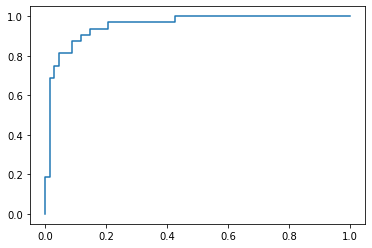

In [55]:
from sklearn.metrics import roc_curve

probab = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test, probab)
plt.plot(fpr, tpr)